In [1]:
%matplotlib inline

import datetime as dt
import numpy as np
import pandas as pd
from pandas_datareader import data
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import scipy.optimize as opt
import scipy.stats as st
import matplotlib.pyplot as plt

In [43]:
from_date = '2015-01-01'
to_date = '2015-12-31'
symbols = ['AAPL','GOOG','AMZN','FB','MSFT']

bench_raw_data = data.DataReader('SPY','yahoo',from_date,to_date)
stock_raw_data = {}
for symbol in symbols:
    stock_raw_data[symbol] = data.DataReader(symbol,'yahoo',from_date,to_date)
stock_raw_data = pd.Panel(stock_raw_data)

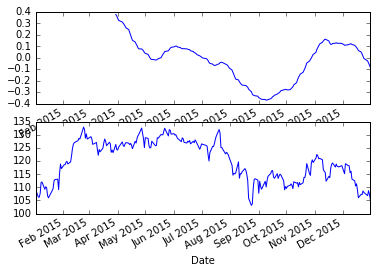

In [70]:
prices = stock_raw_data['AAPL']['Close']
ma1_prices = pd.rolling_mean(prices,window=26)
ma2_prices = pd.rolling_mean(prices,window=60)

def compute_trend(data):
    reg = LinearRegression()
    _x = np.array(range(len(data))).reshape(len(data),1)
    _y = np.array(data).reshape(len(data),1)
    reg.fit(X=_x,y=_y)
    return reg.coef_[0,0]


plt.subplot(211)
trends = pd.rolling_apply(prices,window=60,func=compute_trend)
trends.plot()
plt.subplot(212)
prices.plot()
# ma1_prices.plot()
# ma2_prices.plot()
# plt.xlabel('date')
# plt.ylabel('price')